## Create an inference pipeline

After creating and running a pipeline to train the model, you need a second pipeline that performs the same data transformations for new data, and then uses the trained model to infer (in other words, predict) label values based on its features. This will form the basis for a predictive service that you can publish for applications to use.

### Create and run an inference pipeline

1. In Azure Machine Learning Studio, click the **Designer** page to view all of the pipelines you have created. Then open the **Auto Price Training** pipeline you created previously.

2. Navigate to the the **Create inference pipeline** drop-down list, located on the top right hand corner of the screen. If you do not see it, you may need to expand your screen or click on the ... three dots which represent **More Actions** on the top right hand corner. Then click **Real-time inference pipeline**. After a few seconds, a new version of your pipeline named **Auto Price Training-real time inference** will be opened.

*If the pipeline does not include **Web Service Input** and **Web Service Output** modules, go back to the **Designer** page and then re-open the **Auto Price Training-real time inference** pipeline.*

3. Rename the new pipeline to **Predict Auto Price**, and then review the new pipeline. It contains a web service input for new data to be submitted, and a web service output to return results. Some of the transformations and training steps have been encapsulated in this pipeline so that the statistics from your training data will be used to normalize any new data values, and the trained model will be used to score the new data.

You are going to make the following changes to the inference pipeline in the next steps #4-8:

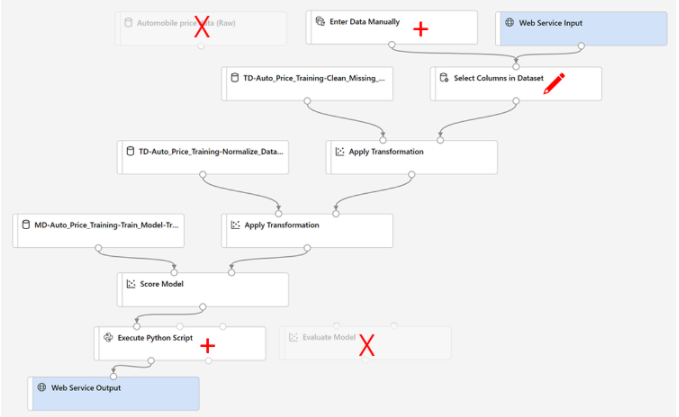

Use the image for reference as you modify the pipeline in the next steps.

4. The inference pipeline assumes that new data will match the schema of the original training data, so the **Automobile price data (Raw)** dataset from the training pipeline is included. However, this input data includes the **price** label that the model predicts, which is unintuitive to include in new car data for which a price prediction has not yet been made. Delete this module and replace it with an **Enter Data Manually** module from the **Data Input and Output** section, containing the following CSV data, which includes feature values without labels for three cars (copy and paste the entire block of text):

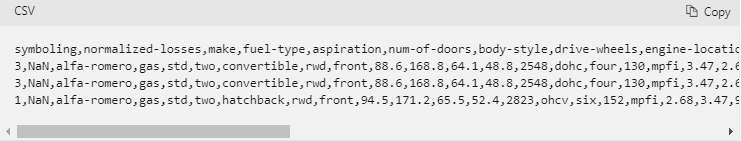

5. Connect the new **Enter Data Manually** module to the same **dataset** input of the **Select Columns in Dataset** module as the **Web Service Input**.

6. Now that you've changed the schema of the incoming data to exclude the **price** field, you need to remove any explicit uses of this field in the remaining modules. Select the **Select Columns in Dataset** module and then in the settings pane, edit the columns to remove the **price** field.

7. The inference pipeline includes the **Evaluate Model** module, which is not useful when predicting from new data, so delete this module.

8. The output from the **Score Model** module includes all of the input features as well as the predicted label. To modify the output to include only the prediction:

- Delete the connection between the **Score Model** module and the **Web Service Output**.

- Add an **Execute Python Script** module from the **Python Language** section, replacing all of the the default python script with the following code (which selects only the **Scored Labels** column and renames it to **predicted_price**):

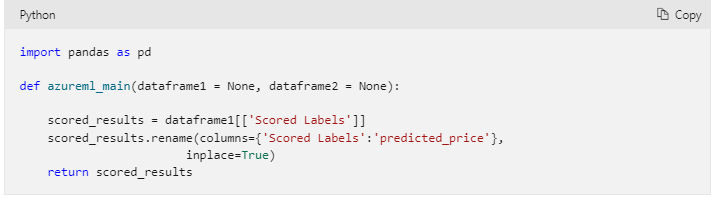

- Connect the output from the **Score Model** module to the **Dataset1** (left-most) input of the **Execute Python Script**, and connect the output of the **Execute Python Script** module to the **Web Service Output**.

9. Verify that your pipeline looks similar to the following:

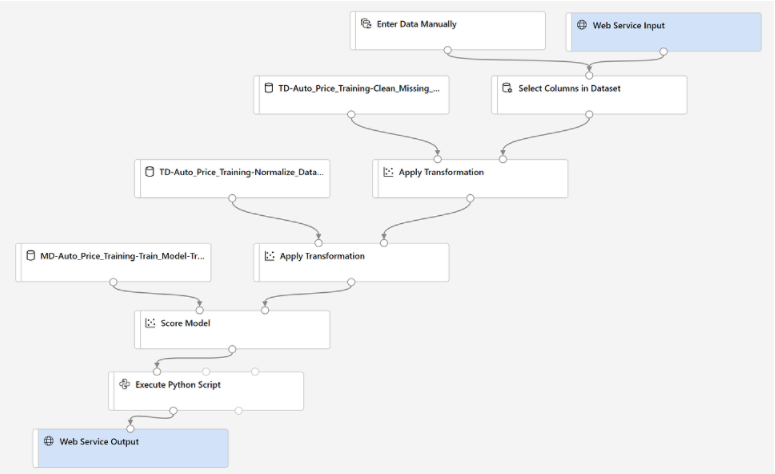

10. Submit the pipeline as a new experiment named **mslearn-auto-inference** on your compute cluster. This may take a while!

11. When the pipeline has completed, select the **Execute Python Script** module, and in the settings pane, on the **Output + logs** tab, visualize the **Result dataset** to see the predicted prices for the three cars in the input data.

12. Close the visualization window.

Your inference pipeline predicts prices for cars based on their features. Now you're ready to publish the pipeline so that client applications can use it.